In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import wikipedia


In [8]:
df = pd.read_csv('/Users/vispande2/Documents/DecesionBook/1972_2016_movie_list.csv')

In [9]:
df

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,1,tt0110912,2013-04-23,2013-04-23,NaN,Pulp Fiction,Pulp Fiction,https://www.imdb.com/title/tt0110912/,Movie,8.9,154.0,1994.0,"Crime, Drama",2273005,1994-10-21,Quentin Tarantino
1,2,tt1872181,2013-04-23,2013-04-23,NaN,The Amazing Spider-Man 2,The Amazing Spider-Man 2,https://www.imdb.com/title/tt1872181/,Movie,6.6,142.0,2014.0,"Action, Adventure, Sci-Fi",551042,2014-04-16,Marc Webb
2,3,tt0111161,2013-04-23,2013-04-23,NaN,The Shawshank Redemption,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,Movie,9.3,142.0,1994.0,Drama,2959951,1995-02-17,Frank Darabont
3,4,tt0076759,2013-04-23,2013-04-23,NaN,Star Wars: Episode IV - A New Hope,Star Wars,https://www.imdb.com/title/tt0076759/,Movie,8.6,121.0,1977.0,"Action, Adventure, Fantasy, Sci-Fi",1477208,1978-01-29,George Lucas
4,5,tt0088763,2013-04-23,2013-04-23,NaN,Back to the Future,Back to the Future,https://www.imdb.com/title/tt0088763/,Movie,8.5,116.0,1985.0,"Adventure, Comedy, Sci-Fi",1340853,1985-12-04,Robert Zemeckis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,9922,tt0775440,2015-02-12,2015-02-12,NaN,Cell,Cell,https://www.imdb.com/title/tt0775440/,Movie,4.4,98.0,2016.0,"Action, Adventure, Horror, Sci-Fi, Thriller",31229,2016-08-26,Tod Williams
9922,9923,tt3748172,2015-02-12,2015-02-12,NaN,Gerald's Game,Gerald's Game,https://www.imdb.com/title/tt3748172/,Movie,6.5,103.0,2017.0,"Drama, Horror, Thriller",132253,2017-09-29,Mike Flanagan
9923,9924,tt3319460,2015-02-12,2015-02-12,NaN,Lisey's Story,Lisey's Story,https://www.imdb.com/title/tt3319460/,TV Mini Series,5.9,50.0,2021.0,"Drama, Fantasy, Horror, Mystery, Thriller",7022,2021-06-04,NaN
9924,9925,tt4425200,2015-02-12,2015-02-12,NaN,John Wick: Chapter 2,John Wick: Chapter 2,https://www.imdb.com/title/tt4425200/,Movie,7.4,122.0,2017.0,"Action, Crime, Thriller",525919,2017-02-17,Chad Stahelski


In [10]:
df.shape

(9926, 16)

In [11]:
def search_wikipedia_link(query):
    """
    Searches Google for a Wikipedia link related to the given query.

    Args:
        query (str): The search query.

    Returns:
        str: The first Wikipedia link found, or a message if no link is found.
    """
    # Construct the Google search URL
    search_url = f"https://www.google.com/search?q={query}+site:wikipedia.org"

    # Set the user-agent to mimic a browser request
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    # Send the HTTP request to Google
    response = requests.get(search_url, headers=headers)

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the links in the search results
    links = soup.find_all('a')

    # Iterate over the links to find the first Wikipedia link
    for link in links:
        href = link.get('href')
        if href and "wikipedia.org" in href:
            # Extract the actual URL from the href attribute
            start = href.find("http")
            end = href.find("&", start)
            wikipedia_link = href[start:end]
            return wikipedia_link

    return "No Wikipedia link found."

# Example usage
#query = "Python programming language"
#wikipedia_link = search_wikipedia_link(query)
#print(wikipedia_link)

In [18]:

wiki_movie_links = []
for i in range(df.shape[0]):
    mov_search_str = df.iloc[i]['Title']+' Movie Wikipedia'
    wiki_movie_links.append(search_wikipedia_link(mov_search_str))
    if i%90==0:
        print(i)
        time.sleep(15)

0
90
180
270
360
450
540
630
720
810
900
990
1080
1170
1260
1350
1440
1530
1620
1710
1800
1890
1980
2070
2160
2250
2340
2430
2520
2610
2700
2790
2880
2970
3060
3150
3240
3330
3420
3510
3600
3690
3780
3870
3960
4050
4140
4230
4320
4410
4500
4590
4680
4770
4860
4950
5040
5130
5220
5310
5400
5490
5580
5670
5760
5850
5940
6030
6120
6210
6300
6390
6480
6570
6660
6750
6840
6930
7020
7110
7200
7290
7380
7470
7560
7650
7740
7830
7920
8010
8100
8190
8280
8370
8460
8550
8640
8730
8820
8910
9000
9090
9180
9270
9360
9450
9540
9630
9720
9810
9900


In [19]:
df['Movie Wiki'] = wiki_movie_links

In [ ]:
def get_wikipedia_content_from_link(wikipedia_link):
    try:
        page = wikipedia.page(url=wikipedia_link)
        return {
            'title': page.title,
            'content': page.content
        }
    except wikipedia.exceptions.PageError:
        return "No Wikipedia page found for the provided link."

# Example usage
wikipedia_link = "https://en.wikipedia.org/wiki/Python_(programming_language)"
wikipedia_content = get_wikipedia_content_from_link(wikipedia_link)
print(wikipedia_content['title'])
print(wikipedia_content['content'])

In [36]:
len(wiki_movie_links)

2451

In [ ]:
columns = ['Position', 'Title','Original Title', 'URL', 'Title Type', 'IMDb Rating', 'Runtime (mins)',
            'Year', 'Genres', 'Num Votes', 'Release Date', 'Directors','Movie Wiki']

In [ ]:
df_new = df[columns]
df_new.to_csv('movies.csv',index=False)

In [22]:
3%2

1

In [20]:
df[df['Movie Wiki']!= 'No Wikipedia link found.']

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Movie Wiki
0,1,tt0110912,2013-04-23,2013-04-23,NaN,Pulp Fiction,Pulp Fiction,https://www.imdb.com/title/tt0110912/,Movie,8.9,154.0,1994.0,"Crime, Drama",2273005,1994-10-21,Quentin Tarantino,
1,2,tt1872181,2013-04-23,2013-04-23,NaN,The Amazing Spider-Man 2,The Amazing Spider-Man 2,https://www.imdb.com/title/tt1872181/,Movie,6.6,142.0,2014.0,"Action, Adventure, Sci-Fi",551042,2014-04-16,Marc Webb,
2,3,tt0111161,2013-04-23,2013-04-23,NaN,The Shawshank Redemption,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/,Movie,9.3,142.0,1994.0,Drama,2959951,1995-02-17,Frank Darabont,
3,4,tt0076759,2013-04-23,2013-04-23,NaN,Star Wars: Episode IV - A New Hope,Star Wars,https://www.imdb.com/title/tt0076759/,Movie,8.6,121.0,1977.0,"Action, Adventure, Fantasy, Sci-Fi",1477208,1978-01-29,George Lucas,
4,5,tt0088763,2013-04-23,2013-04-23,NaN,Back to the Future,Back to the Future,https://www.imdb.com/title/tt0088763/,Movie,8.5,116.0,1985.0,"Adventure, Comedy, Sci-Fi",1340853,1985-12-04,Robert Zemeckis,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,tt1648179,2013-04-23,2013-04-23,NaN,Here Comes the Boom,Here Comes the Boom,https://www.imdb.com/title/tt1648179/,Movie,6.4,105.0,2012.0,"Action, Comedy, Sport",96299,2012-11-09,Frank Coraci,
87,88,tt0903624,2013-04-23,2013-04-23,NaN,The Hobbit: An Unexpected Journey,The Hobbit: An Unexpected Journey,https://www.imdb.com/title/tt0903624/,Movie,7.8,169.0,2012.0,"Adventure, Fantasy",889026,2012-12-13,Peter Jackson,
88,89,tt0837562,2013-04-23,2013-04-23,NaN,Hotel Transylvania,Hotel Transylvania,https://www.imdb.com/title/tt0837562/,Movie,7.0,91.0,2012.0,"Animation, Adventure, Comedy, Family, Fantasy,...",289559,2012-10-12,Genndy Tartakovsky,
89,90,tt0790724,2013-04-23,2013-04-23,NaN,Jack Reacher,Jack Reacher,https://www.imdb.com/title/tt0790724/,Movie,7.0,130.0,2012.0,"Action, Mystery, Thriller",373050,2012-12-26,Christopher McQuarrie,


In [ ]:
#notte -frameowrk for web browser agent
#pyspur - UI based agentic framework

ModuleNotFoundError: No module named 'service'

Resolved 62 packages in 2.08s                                        
Building service==0.6.0                                                
Building service==0.6.0                                        
⠙ Preparing packages... (0/5)
Building service==0.6.0---     0 B/11.61 KiB                   
⠙ Preparing packages... (0/5)
Building service==0.6.0 11.61 KiB/11.61 KiB                 
⠙ Preparing packages... (0/5)
setproctitle ------------------------------ 11.61 KiB/11.61 KiB
Building service==0.6.0-     0 B/13.25 KiB                     
⠙ Preparing packages... (0/5)
setproctitle ------------------------------ 11.61 KiB/11.61 KiB
Building service==0.6.0- 6.76 KiB/13.25 KiB                    
⠙ Preparing packages... (0/5)
setproctitle ------------------------------ 11.61 KiB/11.61 KiB
Building service==0.6.0m 13.25 KiB/13.25 KiB                   
⠙ Preparing packages... (0/5)
setproctitle ------------------------------ 11.61 KiB/11.61 KiB
lockfile   ------------------------------

In [76]:
df = pd.read_csv('temp.csv')

In [77]:
df.columns[0]

'Quantity'

In [73]:
import matplotlib.pyplot as plt
# Apply the 'ggplot' style
plt.style.use('ggplot')

<Axes: xlabel='Quantity'>

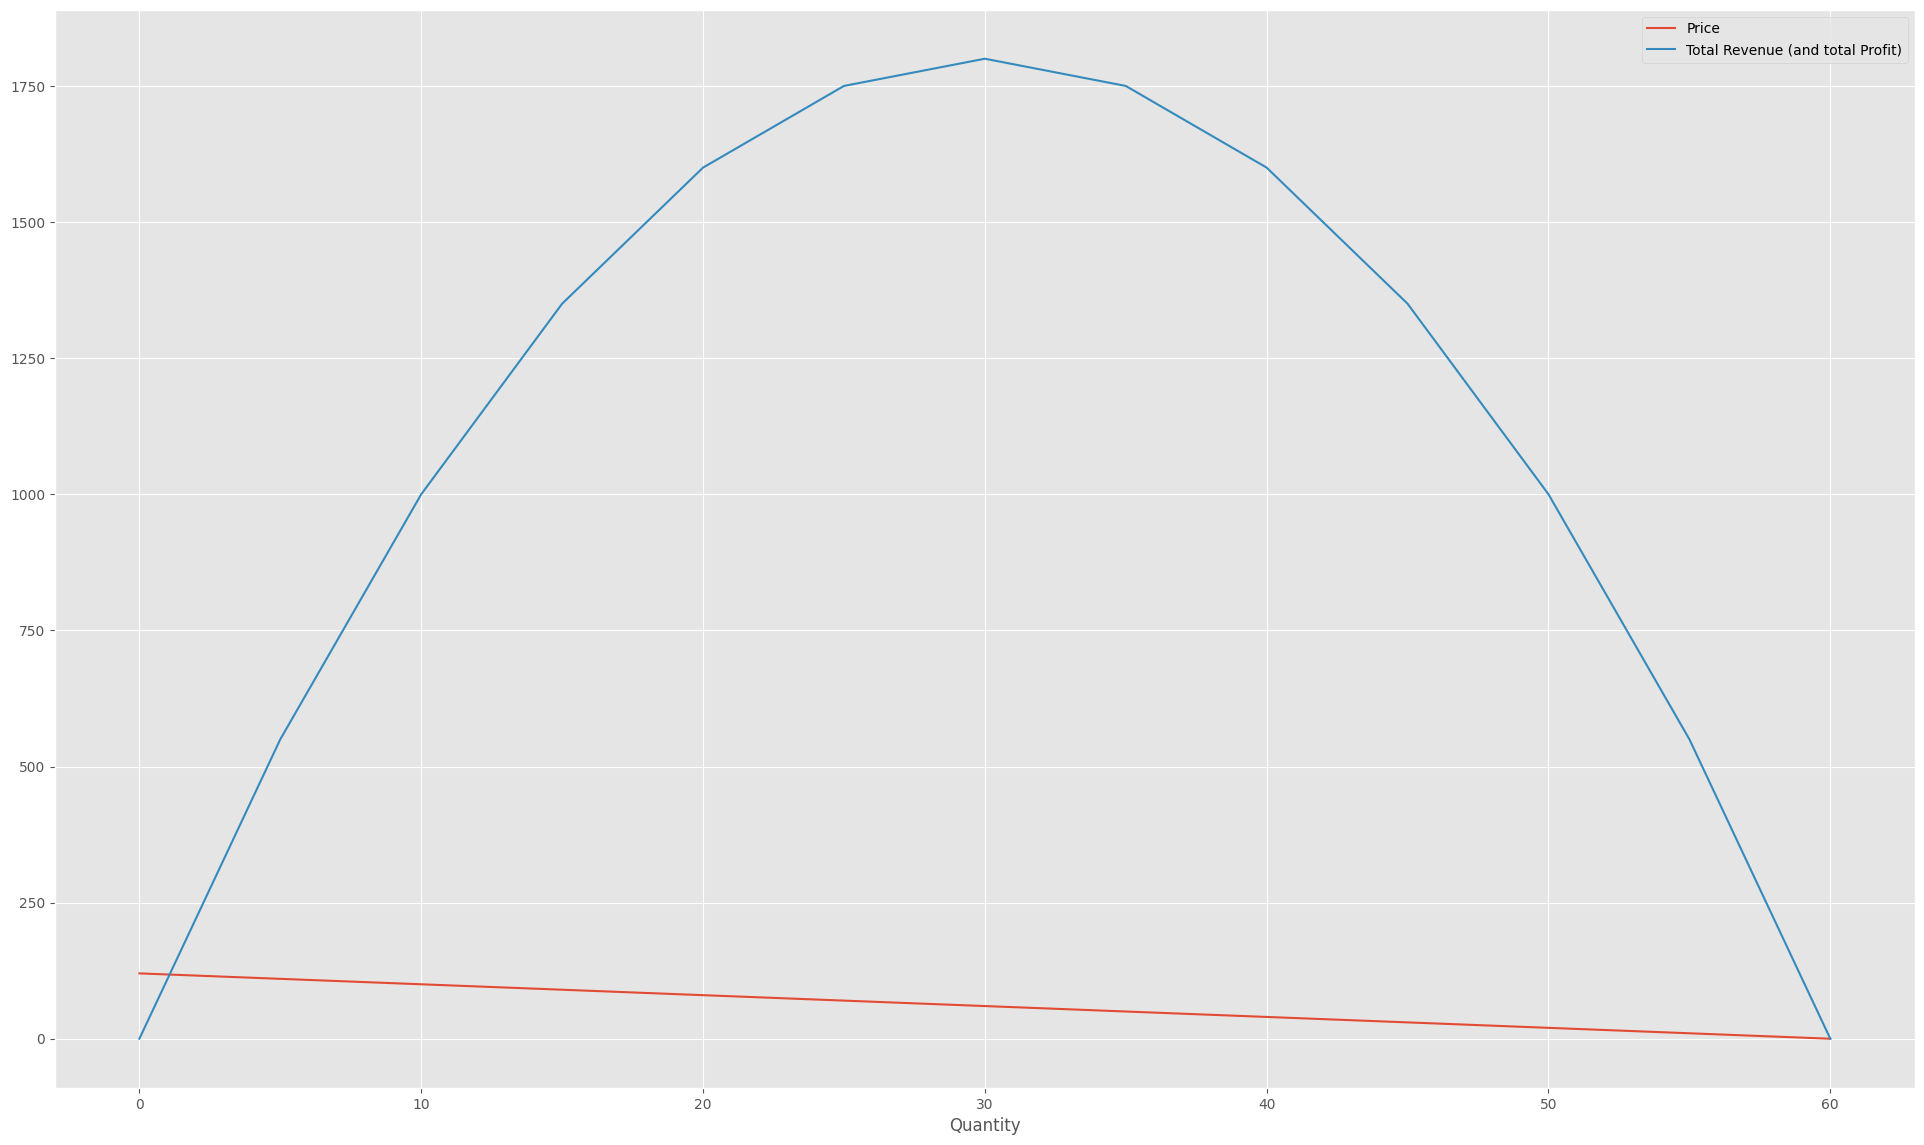

In [84]:
df.plot(x='Quantity',figsize=(24,14))

In [82]:
df=df.astype(int)

In [83]:
df

,Quantity,Price,Total Revenue (and total Profit)
0,0,120,0
1,5,110,550
2,10,100,1000
3,15,90,1350
4,20,80,1600
5,25,70,1750
6,30,60,1800
7,35,50,1750
8,40,40,1600
9,45,30,1350
